In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
def hypothesis_decision(t, p, alpha=0.05):
    """
    Plots the standard normal distribution and highlights the critical regions
    for a two-tailed t-test based on the provided t-statistic and p-value.

    Parameters:
    - t: float
        The t-statistic value from the t-test.
    - p: float
        The p-value from the t-test.
    - alpha: float, optional (default=0.05)
        The significance level for the hypothesis test.
    """
    # Generate data for a standard normal distribution
    x = np.linspace(-4, 4, 1000)
    y = stats.norm.pdf(x, loc=0, scale=1)

    # Define critical t value for illustration
    t_critical = stats.norm.ppf(1 - alpha / 2)  # Critical value for the given alpha

    # Decision based on p-value
    decision = "Decision: Reject H0" if p < alpha else "Decision: Fail to Reject H0"

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='Standard Normal Distribution', color='blue')

    # Highlight critical regions for a two-tailed test in red
    plt.fill_between(x, y, where=(x > t_critical), color='red', alpha=0.3, label='Reject H0 (Critical Region)')
    plt.fill_between(x, y, where=(x < -t_critical), color='red', alpha=0.3)

    # Shade the alpha level in gray
    plt.fill_between(x, y, where=(x > t_critical), color='gray', alpha=0.2, label=f'Alpha = {alpha}')
    plt.fill_between(x, y, where=(x < -t_critical), color='gray', alpha=0.2)

    # Add labels and title
    plt.xlabel('t-statistic')
    plt.ylabel('Probability Density')
    plt.title('Two-Tailed t-Test')
    plt.axvline(x=t_critical, color='black', linestyle='--', label=f't_critical = {t_critical:.2f}')
    plt.axvline(x=-t_critical, color='black', linestyle='--')

    # Add the actual t-statistic line and p-value annotation
    plt.axvline(x=t, color='green', linestyle='--', label=f'actual t = {t:.2f}')
    plt.text(t, 0.1, f'actual t = {t:.2f}\nactual p = {p:.4f}', ha='center', va='bottom', color='red', fontsize=10)

    # Add the decision annotation
    plt.text(0, 0.3, decision, ha='center', va='bottom', color='black', fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

    # Add legend and move it to the top right corner
    plt.legend(loc='upper right')

    # Show the plot
    plt.grid(True)
    plt.show()

In [11]:
## Define 2 random distributions

np.random.seed(624)
#Sample Size
N = 100
#Gaussian distributed data with mean = 2 and var = 1
#a = np.random.randn(N) + 2
#a = np.random.randn(N) + 1
#a = np.random.randn(N) + 0.5
#a = np.random.randn(N) + 0.25
a = np.random.randn(N) + 0.001
#a = np.random.randn(N) + 0.1
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)

## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
s

## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t
if (t > 0):
    p = 1 - stats.t.cdf(t, df = df) # p-value after comparison with the t
else:
    p = stats.t.cdf(t, df = df)

print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))

t = 2.5420586211911433
p = 0.011785489422545758
t = 2.542058621191143
p = 0.011785489422545654


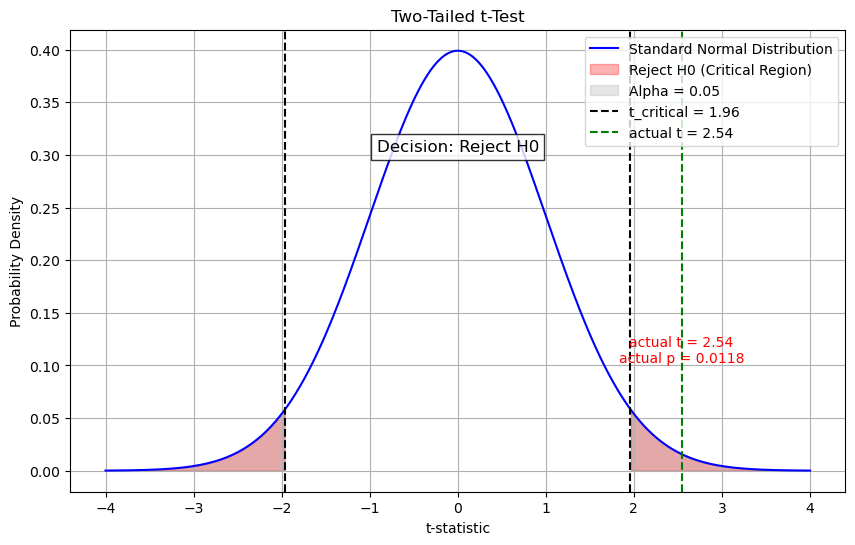

In [12]:
hypothesis_decision(t2, p2)

In [13]:
import sys
print(sys.path)


['C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\python312.zip', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\DLLs', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\Lib', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524', '', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\Lib\\site-packages', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\Lib\\site-packages\\win32', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\isabe\\anaconda3_1\\envs\\iod0524\\Lib\\site-packages\\Pythonwin']
